In [1]:
CIFAR_DIR = 'Downloads/cifar-10-batches-py/'

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']


In [4]:
all_data = [0,1,2,3,4,5,6]

In [5]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [6]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [7]:
batch_meta

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [8]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'filenames', b'data'])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

X = data_batch1[b"data"]
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [10]:
X[0].max()

255

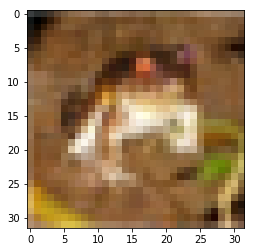

In [11]:
plt.imshow(X[0])

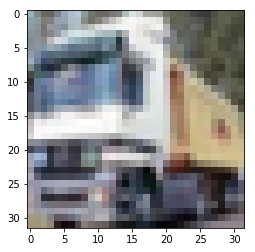

In [12]:
plt.imshow(X[1])


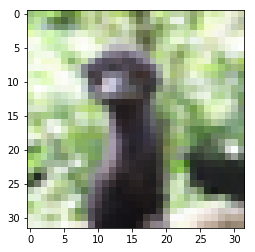

In [13]:
plt.imshow(X[55])

In [14]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode that 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n,vals))
    out[range(n),vec]=1
    return out

class CifarHelper():
    def __init__(self):
        self.i=0
        
        self.all_train_batches = [data_batch1, data_batch2, data_batch3, data_batch4, data_batch5]
        self.test_batch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
        
        
    def set_up_images(self):
        print("setting up training images and labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]),10)
        
        print("setting up test images and labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
                                      
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]),10)
        print("setting images finished")  
    
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch.size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch.size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y
                                   

In [15]:
ch = CifarHelper()
ch.set_up_images()

setting up training images and labels
setting up test images and labels
setting images finished


In [ ]:
import tensorflow as tf

In [ ]:
x = tf.placeholder(tf.float32,shape=[None,32,32,3])
y_true = tf.placeholder(tf.float32,shape=[None,10])